<a href="https://colab.research.google.com/github/sumitrB/DataMining/blob/main/Loan_Defualt_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Default Prediction Model
A classification model to help banks predict loan applicants' likelihood of repayment, optimizing for accuracy while minimizing false positives.


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
import numpy as np

In [44]:
# Extract File from drive
file = '/content/drive/MyDrive/DataMining/Asgn3/loan_history_almost_clean.csv'

# Read the dataset
df = pd.read_csv(file)

In [45]:
df.shape

(7727, 7)

In [46]:
df.head()

,default,amount_of_loan,credit_rating,years_with_bank,rent_mortgage_own,income,age
0,0,1000,B,2.0,0,19200.0,24
1,1,6500,A,2.0,1,66000.0,28
2,0,2400,A,2.0,0,60000.0,36
3,0,10000,C,3.0,0,62000.0,24
4,1,4000,C,2.0,0,20000.0,28


## Data Cleaning & Preprocessing

In [47]:
# only print columns with missing data
missing_data = df.isnull().sum()
print (missing_data[missing_data > 0])

years_with_bank    1
dtype: int64


In [48]:
# Since only one missing value in the entire dataset, lets drop the row
df = df.dropna()

In [49]:
# function to display unique values in df columns
def display_unique_column_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values for column '{column}':")
        print(unique_values)
        print()

In [50]:
display_unique_column_values(df)

Unique values for column 'default':
[0 1]

Unique values for column 'amount_of_loan':
[ 1000  6500  2400 10000  4000  5000  6000  4200 12000  3600 13000  1500
  4800  1200  7000  2475  7200  7600  1800  2600  7875  6250 17000  3500
 18000 16750 25000  2000  2100 13500  9250 11000  3200  8000  6950  7500
  7750  9000 14000 10500 11200 12500  5400  5900  1100 15000  5600 13375
 20000  9600 22000  5775 14400  3800  4600 14100  6200 13200  9450 16800
  2300  2500 10800 17800  6300  5650  9500 24000 19975 23500 10400  3000
  1600  4500 12250 12875  1050 13750 11500 32000  8400 22750 33000   900
  5500 15600  1925 19550 15450 16000 23000  2800 14500 21000  4075 12375
  6350  6925  7125  2050  7475 24175 35000  7300  9700 28000 16525  1400
 12800  7400  2200  6400  5200  9800  8650 11700 24250  2350  5325 30000
 21600 12600 14150  1950  6600  7150 22350 11400  5050  8800  8500 27575
 10875  9975  8850  4050 14125 26400  1300  4750 13250 19600  7100 20500
 17200  8600 18500  8450 11450  6850 1

In [51]:
# Encoding Credit Rating Value to numerical
credit_mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}

# Apply mapping to the dataset
df["credit_rating"] = df["credit_rating"].map(credit_mapping)

# Verify encoding
print(df["credit_rating"].unique())

[2 1 3 4 5 6 7]


In [52]:
df.head()

,default,amount_of_loan,credit_rating,years_with_bank,rent_mortgage_own,income,age
0,0,1000,2,2.0,0,19200.0,24
1,1,6500,1,2.0,1,66000.0,28
2,0,2400,1,2.0,0,60000.0,36
3,0,10000,3,3.0,0,62000.0,24
4,1,4000,3,2.0,0,20000.0,28


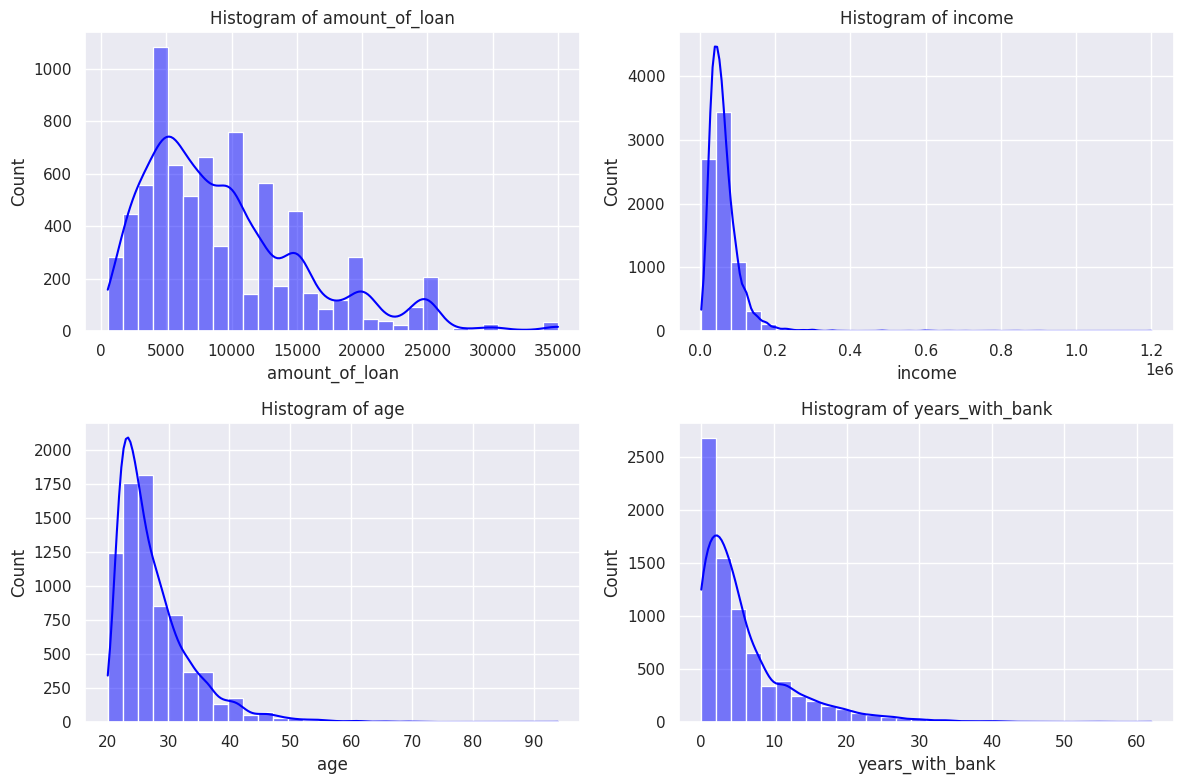

In [53]:
# Feature Distribution Histograms
sns.set(style="darkgrid")

# Define numerical features for visualization
numerical_features = ["amount_of_loan", "income", "age", "years_with_bank"]

# Create a figure with subplots
plt.figure(figsize=(12, 8))

# Generate histograms for each numerical feature
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of plots
    sns.histplot(df[col], bins=30, kde=True, color="blue")  # kde=True adds a density curve
    plt.title(f"Histogram of {col}")

# Show plots
plt.tight_layout()
plt.show()

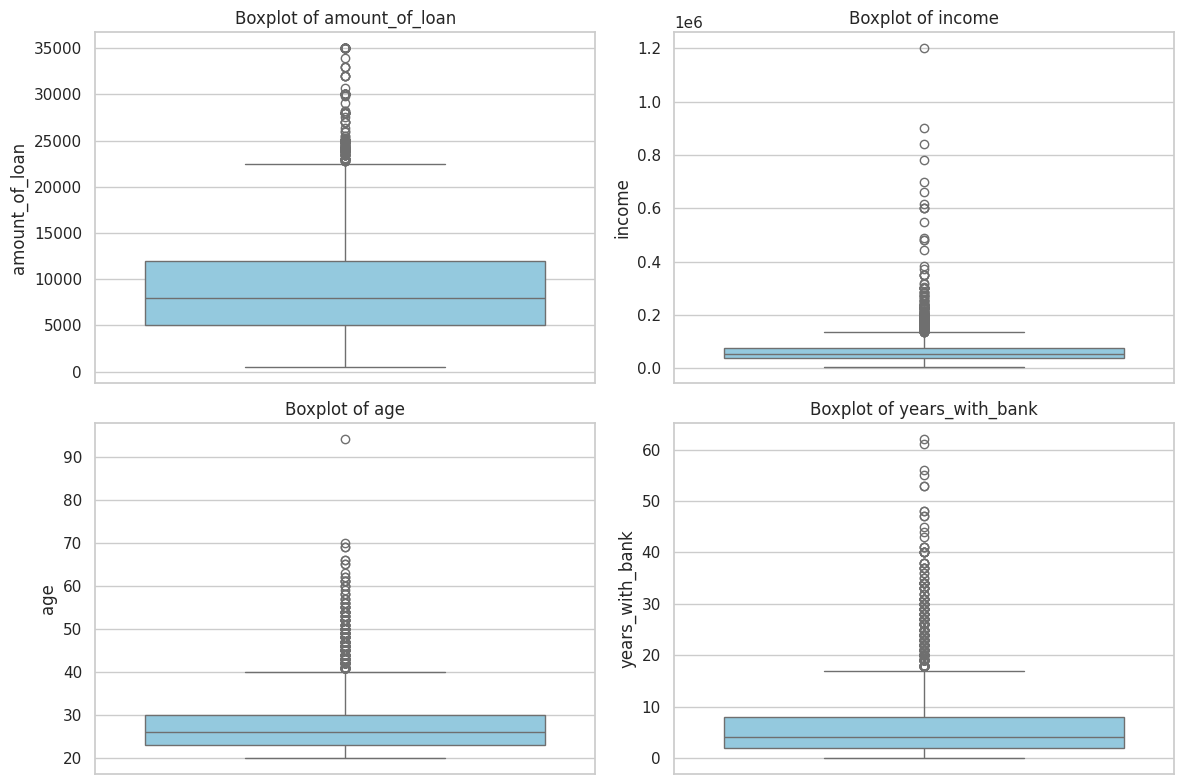

In [54]:
# check for Outliers
sns.set(style="whitegrid")

# Define numerical features for visualization
numerical_features = ["amount_of_loan", "income", "age", "years_with_bank"]

# Create a figure with subplots
plt.figure(figsize=(12, 8))

# Generate boxplots for each numerical feature
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of plots
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

# Show plots
plt.tight_layout()
plt.show()

The data contains some outliers in amount_of_loan, income, age, and years_with_bank, but these values appear reasonable and reflect real-world variations in financial behavior.

array([[<Axes: title={'center': 'amount_of_loan'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

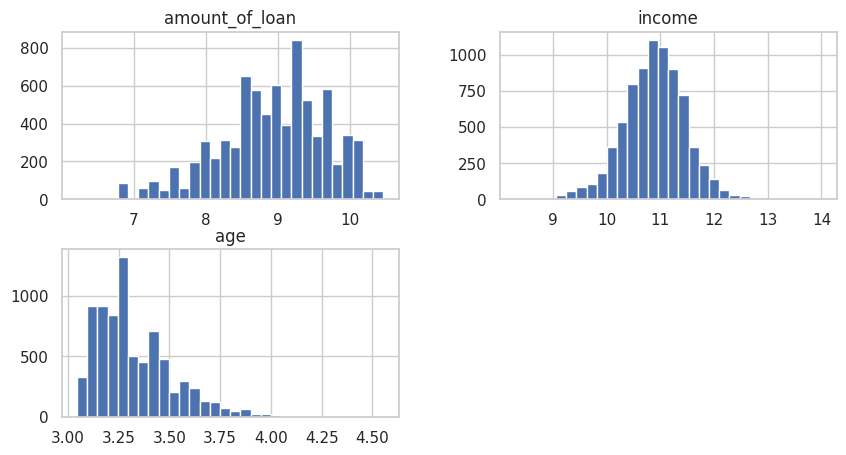

In [55]:
# Apply log transformation to reduce skewness
df["amount_of_loan"] = np.log1p(df["amount_of_loan"])  # log1p(x) = log(x+1) to handle 0 values safely
df["income"] = np.log1p(df["income"])
df["age"] = np.log1p(df["age"])

# Verify transformation
df[["amount_of_loan", "income", "age"]].hist(bins=30, figsize=(10, 5))  # Check distribution after transformation

## Feature Selection

In [56]:
# Check class distribution
default_counts = df['default'].value_counts(normalize=True)  # Get percentages
print("Class Distribution:\n", df['default'].value_counts())
print("\nPercentage Distribution:\n", default_counts)

Class Distribution:
 default
0    4029
1    3697
Name: count, dtype: int64

Percentage Distribution:
 default
0    0.521486
1    0.478514
Name: proportion, dtype: float64


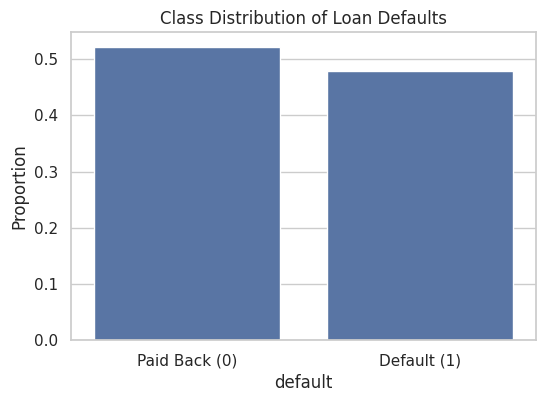

In [57]:
# Visualize the distribution
plt.figure(figsize=(6,4))
sns.barplot(x=default_counts.index, y=default_counts.values)
plt.xticks([0,1], ['Paid Back (0)', 'Default (1)'])
plt.ylabel('Proportion')
plt.title('Class Distribution of Loan Defaults')
plt.show()

the class distribution is relatively balanced

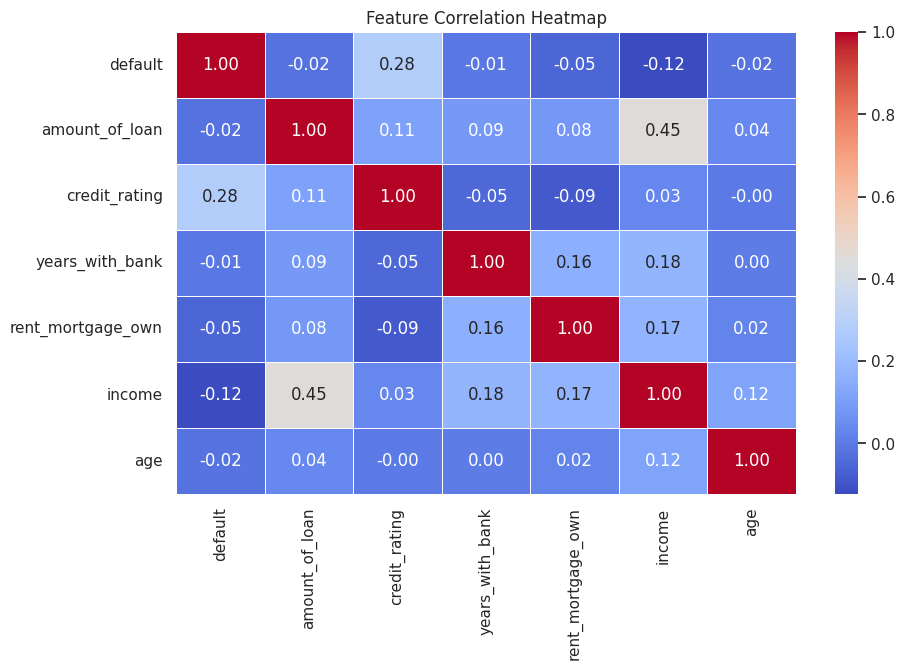

In [58]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

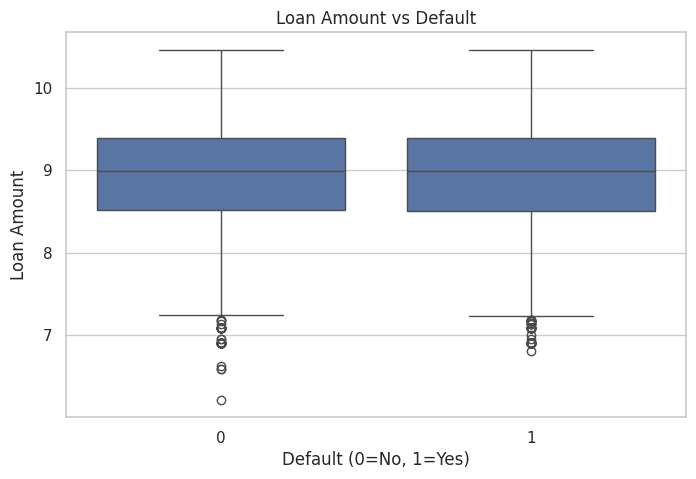

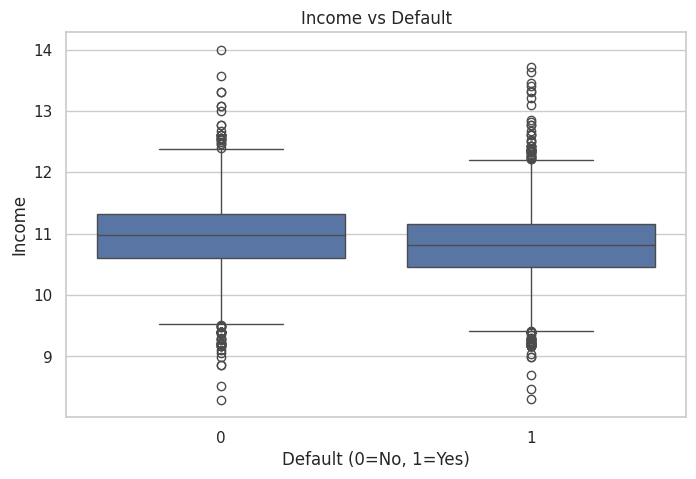

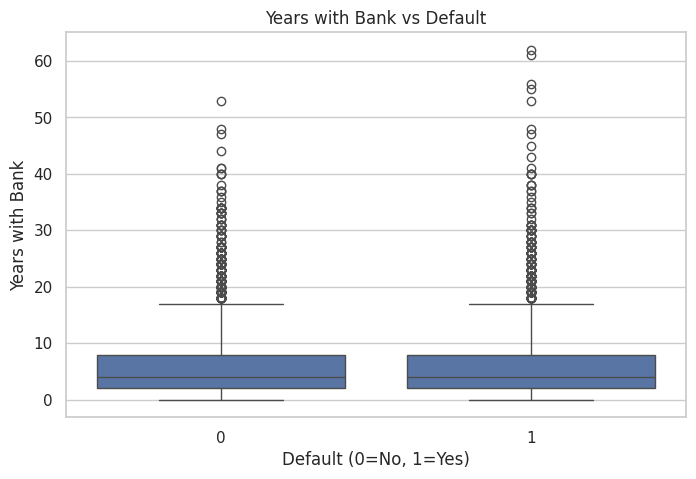

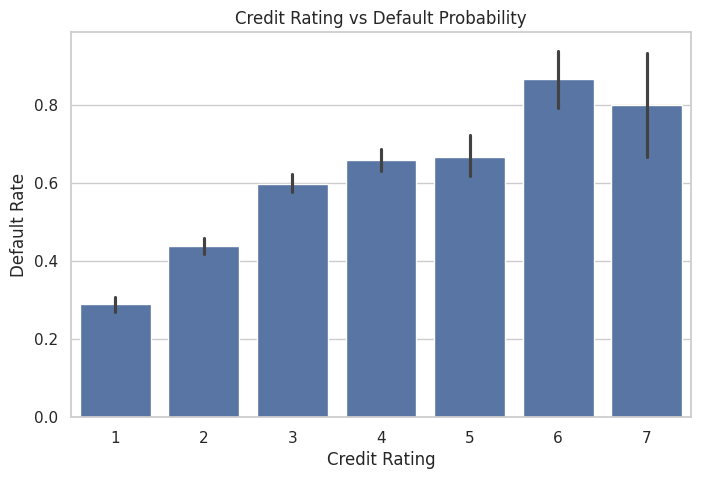

In [59]:
# To visualize relationships between numerical features and loan defaults
plt.figure(figsize=(8,5))
sns.boxplot(x=df["default"], y=df["amount_of_loan"])
plt.title("Loan Amount vs Default")
plt.xlabel("Default (0=No, 1=Yes)")
plt.ylabel("Loan Amount")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df["default"], y=df["income"])
plt.title("Income vs Default")
plt.xlabel("Default (0=No, 1=Yes)")
plt.ylabel("Income")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df["default"], y=df["years_with_bank"])
plt.title("Years with Bank vs Default")
plt.xlabel("Default (0=No, 1=Yes)")
plt.ylabel("Years with Bank")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=df["credit_rating"], y=df["default"])
plt.title("Credit Rating vs Default Probability")
plt.xlabel("Credit Rating")
plt.ylabel("Default Rate")
plt.show()


### **Takeway**

*   Credit Rating is the strongest predictor (higher rating → higher default rate).
*   Income has a weak negative correlation (higher income → slightly lower default risk).
*    Loan Amount, Years with Bank, and Age show no clear impact on default risk.


## Model Training

In [60]:
from sklearn.model_selection import train_test_split

# Selecting the best features based on previous analysis
features = ["credit_rating", "income", "years_with_bank"]
X = df[features]  # Feature matrix
y = df["default"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Confirm split
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 6180
Testing set size: 1546


In [61]:
# check distribution of dependent variable in TT
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Training True  : 2957 (47.85%)
Training False : 3223 (52.15%)

Test True      : 740 (47.87%)
Test False     : 806 (52.13%)


In [62]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForest with balanced class weight
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="accuracy")

# Print results
print(f"RandomForest CV Accuracy: {cv_scores.mean():.4f}")

RandomForest CV Accuracy: 0.6104


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize logistic regression
log_reg = LogisticRegression(class_weight="balanced", random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring="accuracy")

# Print results
print(f"Logistic Regression CV Accuracy: {cv_scores.mean():.4f}")

Logistic Regression CV Accuracy: 0.6337


In [64]:
from sklearn.svm import SVC

# Initialize SVM with balanced class weight
svm_model = SVC(kernel="rbf", class_weight="balanced", random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring="accuracy")

# Print results
print(f"SVM CV Accuracy: {cv_scores.mean():.4f}")

SVM CV Accuracy: 0.6275


In [65]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

# Initialize LightGBM with balanced class weight
lgbm_model = LGBMClassifier(class_weight="balanced", random_state=42, verbose=-1)

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(lgbm_model, X_train, y_train, cv=5, scoring="accuracy")

# Print results
print(f"LightGBM CV Accuracy: {cv_scores.mean():.4f}")

LightGBM CV Accuracy: 0.6254


After evaluating individual models using 5-Fold Cross-Validation, the results showed that Logistic Regression had the highest accuracy of 0.6337. Lets try Voting classifier to increase our accuracy and stability.

In [72]:
from sklearn.ensemble import VotingClassifier

# Initialize the best models based on CV results
log_reg = LogisticRegression(class_weight="balanced", random_state=42)
svm_model = SVC(kernel="rbf", class_weight="balanced", probability=True, random_state=42)  # Probability=True for soft voting
lgbm = LGBMClassifier(class_weight="balanced", random_state=42, verbose=-1)

# Create Voting Classifier (Soft Voting)
ensemble_model = VotingClassifier(
    estimators=[("log_reg", log_reg), ("svm", svm_model), ("lgbm", lgbm)],
    voting="soft"  # Soft voting gives weight to model confidence
)

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(ensemble_model, X_train, y_train, cv=5, scoring="accuracy")

# Train Final Model on Full Training Set
ensemble_model.fit(X_train, y_train)

# Evaluate on Test Set
y_pred_test = ensemble_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print Results
print(f"Ensemble 5-Fold CV Accuracy: {cv_scores.mean():.4f}")
print(f"Ensemble Test Accuracy: {test_accuracy:.4f}")


Ensemble 5-Fold CV Accuracy: 0.6405
Ensemble Test Accuracy: 0.6552


In [73]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions on test set
y_pred_test = ensemble_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cm)

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Confusion Matrix:
 [[558 248]
 [285 455]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.69      0.68       806
           1       0.65      0.61      0.63       740

    accuracy                           0.66      1546
   macro avg       0.65      0.65      0.65      1546
weighted avg       0.65      0.66      0.65      1546



After extensive model testing and optimization, the Voting Classifier (Ensemble Model) achieved 65.52% test accuracy, outperforming all individual models.


*    False Positives (248) < False Negatives (285)
*   5-Fold CV Accuracy: 64.05% | Test Accuracy: 65.52%

